# <span style="color:black"><center>Exploratory Data Analysis on dataset Global Terrorism 

### Author- JUGAL KUMAR


### Trainee Intern @Coders Ready

### Month - SEPT 2022

#  <span style="color:Blue"><center>OBJECTIVE

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

### <span style="color:red"><center>CONTENTS


1) What this data set is all about?

2) Installation of libraries and dataset

3) Cleaning of dataset

4) Terrorists Activities Over The Years

5) Countries Affected By Terrorism

6) Regional Attacks That Are Attacked Over The Years

7) Casualties

8) Groups That Are Linked With Terrorists

9) Cities That Are being Affected By Terrorism

10) Success rate

11) Most Attacks Done By Terrorists

12) Most Weapons Used By Terrorists

13) Summary

14) Conclusion

### 1. What this data set is all about?


### This dataset is consist of terrorist attacks around the world from 1970 to 2017.

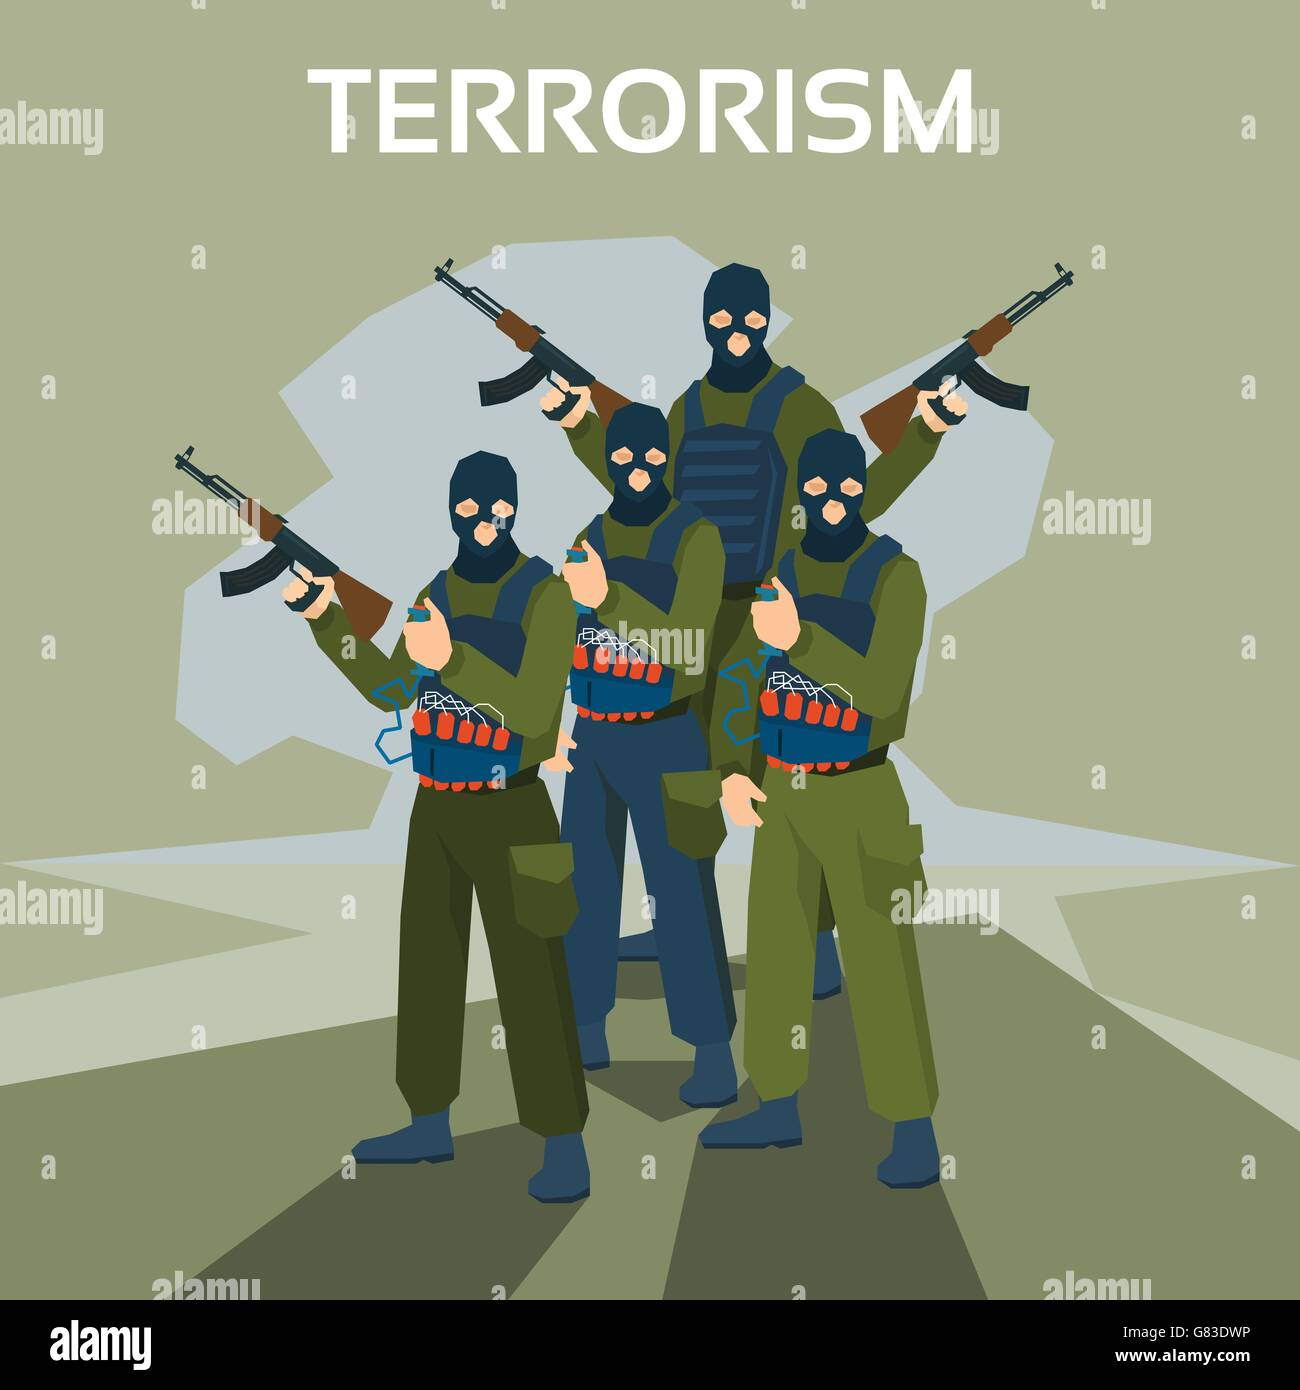

### 2) Installation of libraries and dataset

In [2]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import re
from PIL import Image
from IPython.display import display

In [34]:
df = pd.read_csv('Copy of globalterrorism.csv',encoding='latin-1')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_13872\1207128430.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copy of globalterrorism.csv',encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### 3) Cleaning of dataset

In [120]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target type','weaptype1_txt':'Weapon type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','Attack Type','Killed','Wounded','Target','Summary','success','Group','Target type','Weapon type','Motive']]

In [121]:
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Killed,Wounded,Target,Summary,success,Group,Target type,Weapon type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,1,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,1,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,1,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,1,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,1,Unknown,Government (Diplomatic),Incendiary,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Attack Type  181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  success      181691 non-null  int64  
 14  Group        181691 non-null  object 
 15  Target type  181691 non-null  object 
 16  Weapon type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(4),

### 4) Terrorists Activities Over The Years

[(2014, 16903), (2015, 14965), (2016, 13587), (2013, 12036), (2017, 10900), (2012, 8522), (2011, 5076), (1992, 5071), (2010, 4826), (2008, 4805)]


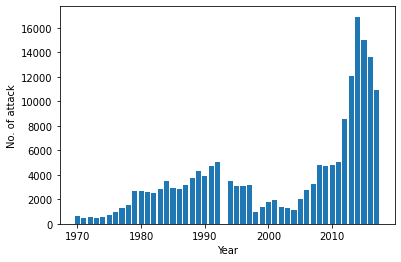

In [157]:
print(datam.most_common()[:10])
plt.bar(df['Year'].value_counts()[:60].index,df['Year'].value_counts()[:60].values)
plt.xlabel('Year')
plt.ylabel('No. of attack')
plt.show()

### 5) Countries Affected By Terrorism

[('Iraq', 24636), ('Pakistan', 14368), ('Afghanistan', 12731), ('India', 11960), ('Colombia', 8306)]


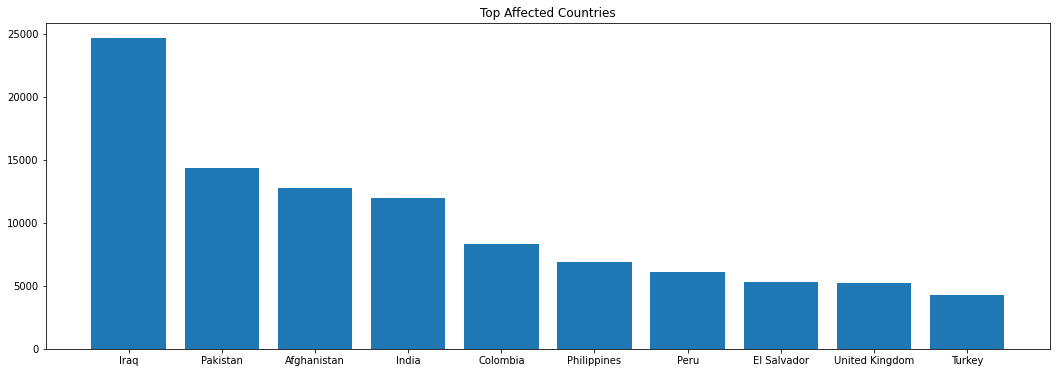

In [101]:
cont=list(df['Country'])
sn=[]
da = Counter(cont)
s=list(da.most_common()[:5])
print(s)
plt.subplots(figsize=(18,6))
plt.bar(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Affected Countries')
plt.show()

### 6) Regional Attacks That Are Attacked Over The Years

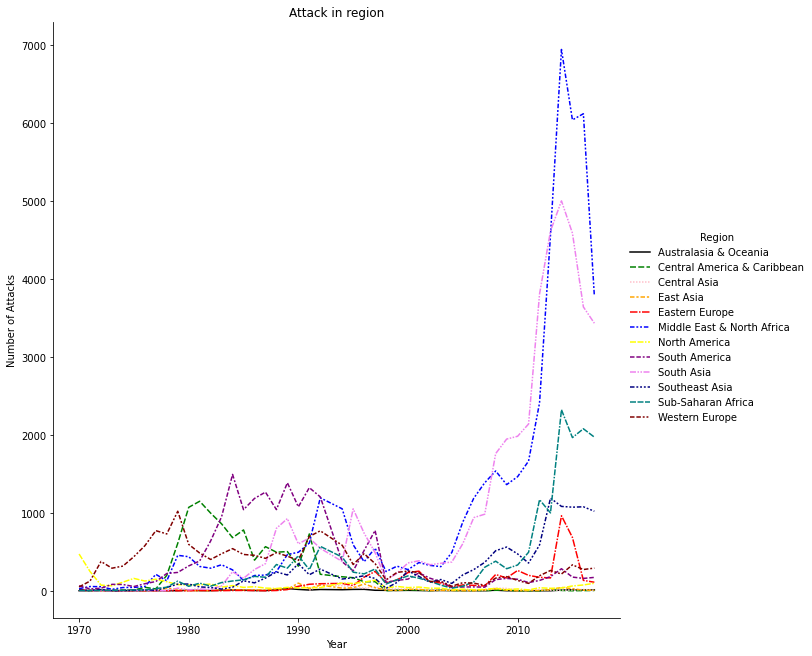

In [61]:
def attacks_region(data):
    d = data.groupby(['Region','Year'])['Year'].count()
    d = pd.DataFrame(d)
    d.reset_index(level=0,inplace=True)
    d.columns = ['Region','Number of Attacks']
    d.reset_index(level=0,inplace=True)
    sns.relplot(data=d, x="Year", y="Number of Attacks",hue="Region", style="Region",palette=["black","green","pink","orange","red","blue","yellow","purple","violet","navy","teal","maroon"],height=9, kind="line")
    plt.title('Attack in region')
    
attacks_region(df)

### 7) Casualties

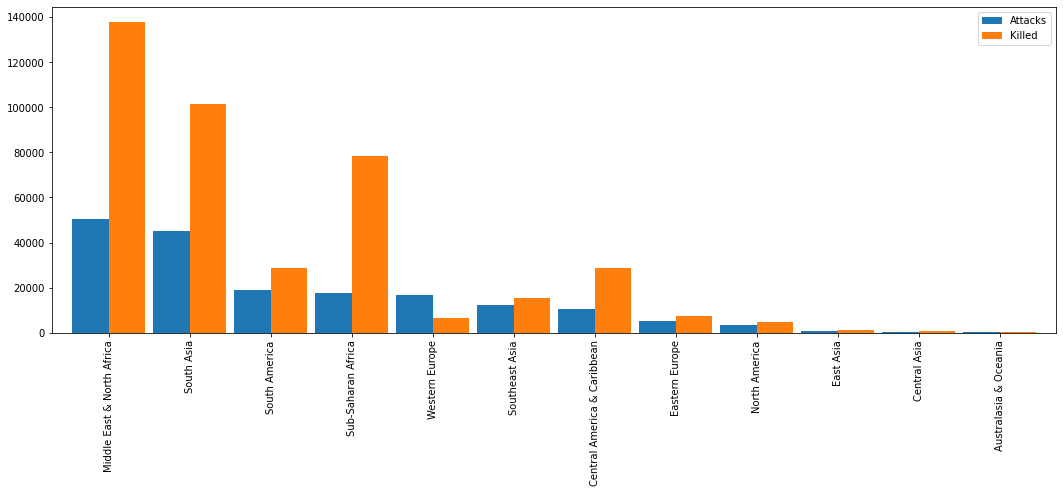

In [75]:
coun_terror=df['Region'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Region')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### 8) Groups That Are Linked With Terrorists

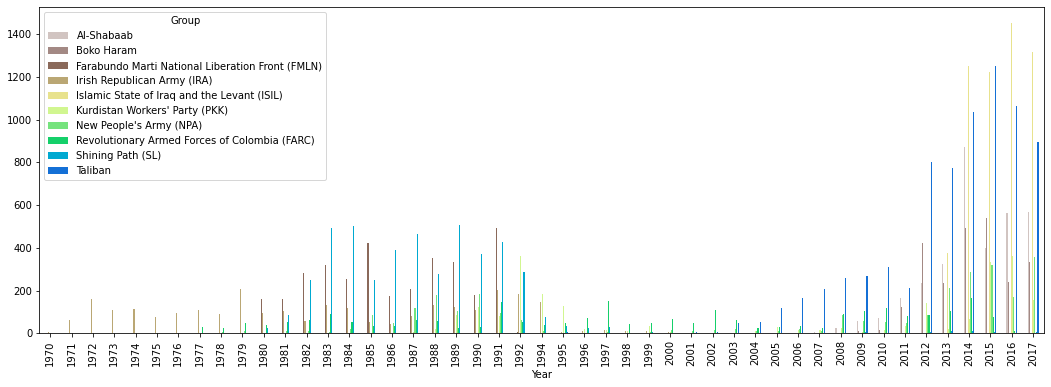

In [74]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot.bar(color=sns.color_palette('terrain_r',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### 9) Cities That Are being Affected By Terrorism

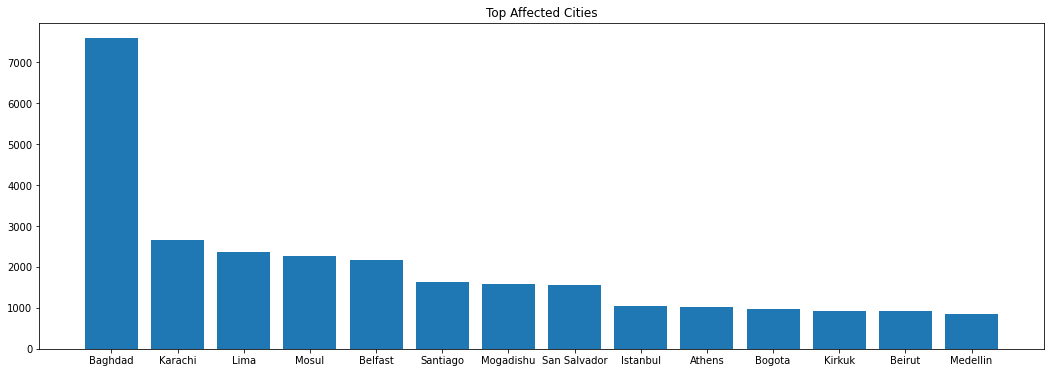

In [104]:
plt.subplots(figsize=(18,6))
plt.bar(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values)
plt.title('Top Affected Cities')
plt.show()

### 10) Success rate

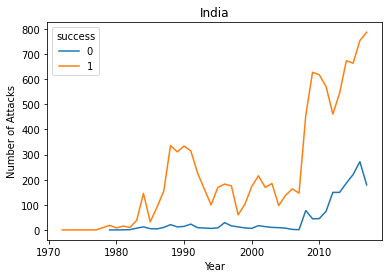

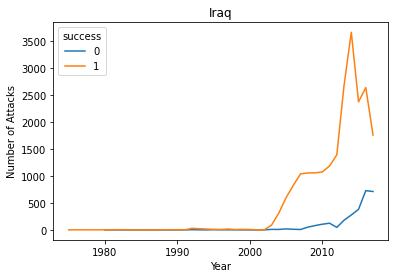

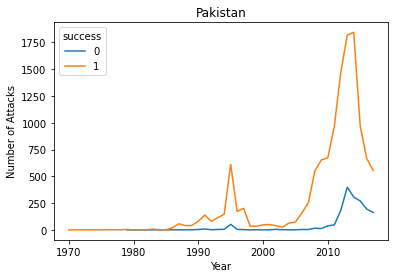

In [87]:
def succ_fail(data,country):
    s = data[data['Country']==country]
    s2 = pd.DataFrame(s.groupby(['Year','success'])['Year'].count())
    s2.columns=['count']
    s2.reset_index(inplace=True)
    p=sns.lineplot(data=s2, x="Year", y="count", hue="success")
    plt.title(country)
    plt.ylabel("Number of Attacks")
    plt.xlabel("Year")
    plt.show()

plot_countries =['India','Iraq','Pakistan']
for i in plot_countries:
    succ_fail(df,i)

### 11) Most Attacks Done By Terrorists 

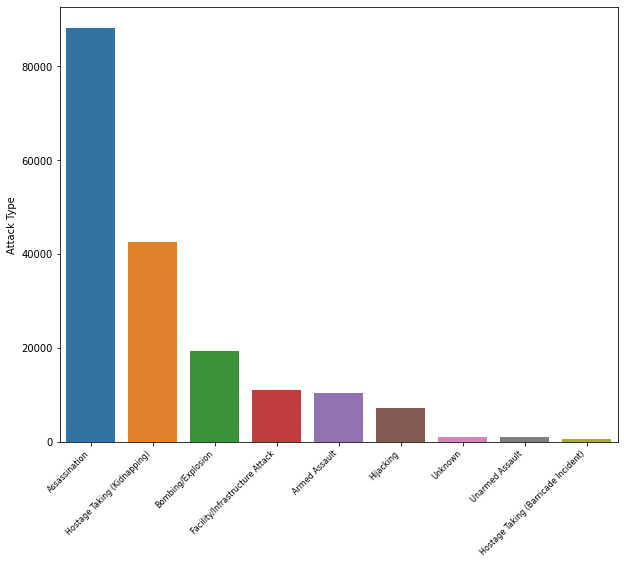

In [126]:
we=[]
[we.append(x) for x in df['Attack Type'] if x not in we]  
fig = plt.figure(figsize =(10,8))
sns.barplot(data=df, x=we, y=df['Attack Type'].value_counts(), errorbar="sd")
plt.xticks(rotation=45,horizontalalignment='right',fontsize=8) 
plt.show()

### 12) Most Weapons Used By Terrorists

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


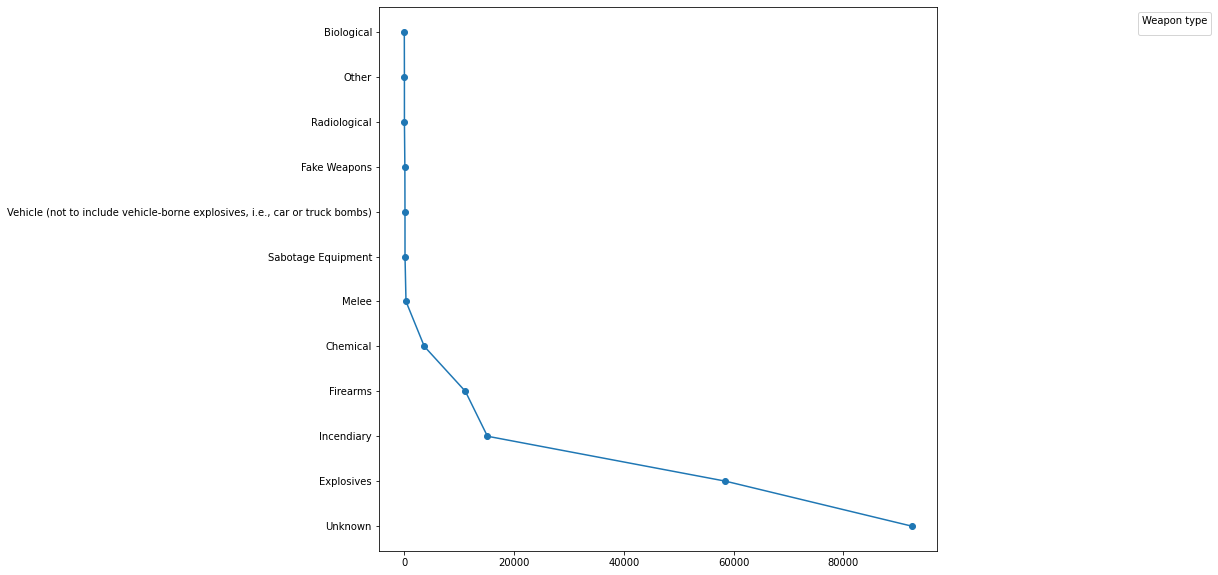

In [136]:
atk=[]
[atk.append(x) for x in df['Weapon type'] if x not in atk]
fig = plt.figure(figsize =(10,10))
explode = (0.1, 0.2, 0.1,0.2,0.2,0.4,0.5,0.7,0.9)
plt.scatter(df['Weapon type'].value_counts(),atk)
plt.plot(df['Weapon type'].value_counts(),atk)
plt.legend(title ="Weapon type",title_fontsize=10,loc ="best",fontsize=10,bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

### 13) Summary

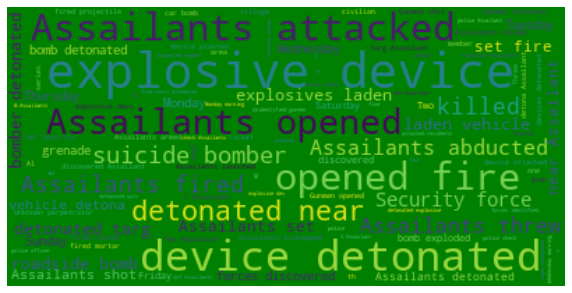

In [83]:
stop=set(STOPWORDS)
stop.add("NaN")
text = df['Summary']
text = text.to_string()
#text = re.sub(' +',' ',text)
alice_wc=WordCloud(background_color='green',max_words=2000,stopwords=stop)
alice_wc.generate(text)
fig=plt.figure(figsize=(10,14))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 14) Conclusion

To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn,plotly allow us to come to conclusions calculating and vizualization.

1. Iraq country has the highest number of attacks throughout the years.

2. Middle and East Africa region has the highest number of attacks.

3. Private citizens and Property were the main targets of terrorist activity.

4. Bombing and Explosion methods were most commonly used in terrorist activity.
 
5. Baghdad city has the highest number of attacks.

6. The most common type of attack was the Assassination


Terrorism touches all aspects of human rights as defined by all declarations, covenants and conventions. The rights set forth in the Universal Declaration of Human Rights stipulate the right to equality, freedom from discrimination, the right to life, liberty, and personal security, freedom from slavery, and freedom from torture and degrading treatment. Terrorism has slammed and affected almost every sphere of human life, be it economic or political or social.